In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset= pd.read_csv('feature_matrix.csv')
dataset

,Unnamed: 0,Primer,Template,Group,Number_of_mismatches,primer_efficiency,annealing_DeltaG,Position_3terminus,All_mismatches,Primer_Sequence,...,no_runs_fw,no_repeats_fw,melting_temp,Self_Dimer_DeltaG,Structure_deltaG_fw,primer_coverage,primer_specificity,Run,Position_3terminusLocal,Number_of_mismatches_hexamer
0,1_Tiller2008_1st,Tiller2008|5_L_VH_1|1_fw,IGHV1-18*04,IGHV1,1,0.307973,-16.688,4,4,acaggtgcccactcccaggtgcag,...,3,1,68.06,-0.765,-1.18,47,0.534091,Tiller2008_1st,3,1
1,2_Tiller2008_1st,Tiller2008|5_L_VH_1|1_fw,IGHV1-2*02,IGHV1,1,0.999927,-16.786,19,19,acaggtgcccactcccaggtgcag,...,3,1,68.06,-0.765,-1.18,47,0.534091,Tiller2008_1st,0,0
2,3_Tiller2008_1st,Tiller2008|5_L_VH_1|1_fw,IGHV1-24*01,IGHV1,4,0.183368,-10.796,4,"19,18,12,4",acaggtgcccactcccaggtgcag,...,3,1,68.06,-0.765,-1.18,47,0.534091,Tiller2008_1st,3,1
3,4_Tiller2008_1st,Tiller2008|5_L_VH_1|1_fw,IGHV1-3*01,IGHV1,1,0.307988,-17.238,4,4,acaggtgcccactcccaggtgcag,...,3,1,68.06,-0.765,-1.18,47,0.534091,Tiller2008_1st,3,1
4,5_Tiller2008_1st,Tiller2008|5_L_VH_1|1_fw,IGHV1-45*02,IGHV1,3,0.606597,-10.505,6,"20,15,6",acaggtgcccactcccaggtgcag,...,3,1,68.06,-0.765,-1.18,47,0.534091,Tiller2008_1st,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,638_openPrimeR2017,Opt5_9_IGHV|23|1:21|21_fw,IGHV4-61*01,IGHV4,10,0.000000,-2.712,2,"21,20,18,17,13,12,9,6,4,2",atggactgcacctggaggatc,...,2,1,58.30,-1.877,0.00,47,0.500000,openPrimeR2017,5,3
825,639_openPrimeR2017,Opt5_9_IGHV|23|1:21|21_fw,IGHV5-10-1*03,IGHV5,9,0.000000,-4.414,3,"21,20,18,17,14,12,6,5,3",atggactgcacctggaggatc,...,2,1,58.30,-1.877,0.00,47,0.500000,openPrimeR2017,4,3
826,640_openPrimeR2017,Opt5_9_IGHV|23|1:21|21_fw,IGHV5-51*03,IGHV5,9,0.000000,-4.414,3,"21,20,18,17,14,12,6,5,3",atggactgcacctggaggatc,...,2,1,58.30,-1.877,0.00,47,0.500000,openPrimeR2017,4,3
827,641_openPrimeR2017,Opt5_9_IGHV|23|1:21|21_fw,IGHV6-1*01,IGHV6,9,0.000000,-1.867,3,"21,17,15,14,12,10,6,4,3",atggactgcacctggaggatc,...,2,1,58.30,-1.877,0.00,47,0.500000,openPrimeR2017,4,3


In [3]:
from IPython.display import display
pd.options.display.max_columns = None

dataset.loc[dataset['Experimental_Coverage'] == 'Amplified', 'Experimental_Coverage'] = 1
dataset.loc[dataset['Experimental_Coverage'] == 'Unamplified', 'Experimental_Coverage'] = 0

In [4]:
dataset['Experimental_Coverage']=dataset['Experimental_Coverage'].astype(str).astype(int)
dataset.describe(include='O')

,Unnamed: 0,Primer,Template,Group,All_mismatches,Primer_Sequence,Terminal_Dinucleotide,Run
count,829,829,829,829,775,829,829,829
unique,829,20,47,7,387,20,6,2
top,1_Tiller2008_1st,Tiller2008|5_L_VH_1|1_fw,IGHV1-45*02,IGHV3,"21,20,19,18,17,13,11,5,4,2,1",acaggtgcccactcccaggtgcag,ag,openPrimeR2017
freq,1,47,20,352,25,47,187,642


In [5]:
dataset.rename(columns = {'Unnamed: 0':'Name'}, inplace = True)
dataset = dataset[[ col for col in dataset.columns if col != 'Experimental_Coverage' ] + ['Experimental_Coverage'] ]
a = ['Name', 'Primer','Template','Group','All_mismatches', 'Primer_Sequence', 'Terminal_Dinucleotide', 'Run']
dataset = dataset[a+ [ col for col in dataset.columns if col not in a] ]

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829 entries, 0 to 828
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          829 non-null    object 
 1   Primer                        829 non-null    object 
 2   Template                      829 non-null    object 
 3   Group                         829 non-null    object 
 4   All_mismatches                775 non-null    object 
 5   Primer_Sequence               829 non-null    object 
 6   Terminal_Dinucleotide         829 non-null    object 
 7   Run                           829 non-null    object 
 8   Number_of_mismatches          829 non-null    int64  
 9   primer_efficiency             829 non-null    float64
 10  annealing_DeltaG              829 non-null    float64
 11  Position_3terminus            829 non-null    int64  
 12  Mismatch_pos_1                829 non-null    int64  
 13  Misma

In [6]:
X= dataset.iloc [:, 8: 31]
y= dataset['Experimental_Coverage']
X.drop(columns=['Number_of_mismatches_hexamer'], inplace=True)

In [16]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=50,random_state=50)
model.fit(X, y)
importances = pd.DataFrame(data={
    'Attribute': X.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

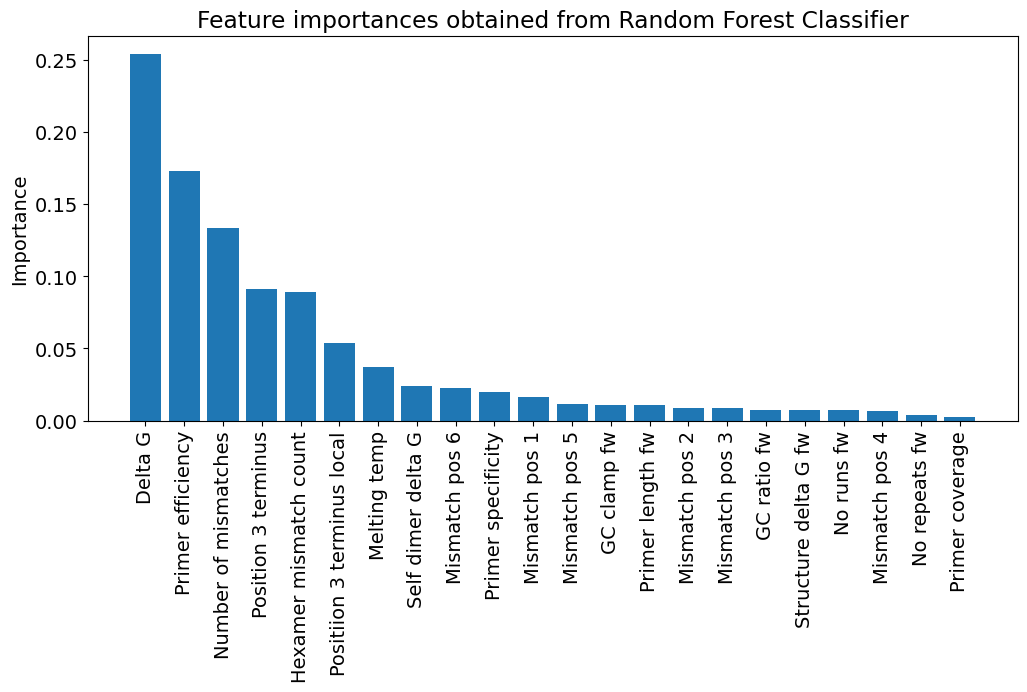

In [17]:
plt.bar(x=importances['Attribute'], height=importances['Importance'])
plt.xticks(np.arange(0, 22),['Delta G', 'Primer efficiency', 'Number of mismatches', 'Position 3 terminus', 'Hexamer mismatch count',
            'Positiion 3 terminus local', 'Melting temp','Self dimer delta G', 'Mismatch pos 6',
            'Primer specificity', 'Mismatch pos 1', 'Mismatch pos 5', 'GC clamp fw', 'Primer length fw',
            'Mismatch pos 2', 'Mismatch pos 3', 'GC ratio fw', 'Structure delta G fw', 'No runs fw',
            'Mismatch pos 4','No repeats fw', 'Primer coverage'])
plt.title('Feature importances obtained from Random Forest Classifier')
plt.ylabel('Importance')
plt.xticks(rotation='vertical')
plt.rcParams['figure.figsize'] = [12, 5]
plt.rcParams['font.size'] = 14

plt.show()

In [18]:
PCR_res = pd.read_csv('PCR_Results.csv')
templates = pd.read_csv('templ_seq.csv')
homo = pd.read_csv('homology.csv')
gibbs = pd.read_csv('GibbsInfo.csv')

In [27]:
data = []
i = 0
pr_temp = pd.DataFrame(columns = ['forward', 'reverse', 'template', 'result', 'seq'])
for index_pr, row_pr in PCR_res.iterrows():
  rev = row_pr['reverse'].strip()
  fow = row_pr['forward'].strip()

  for index_temp, row_temp in templates.iterrows():
    pr_temp.loc[i] = [fow, rev, row_temp['Template_seq'], row_pr[str(index_temp+1)], '']# (row_pr['primer'])
    i = i + 1

In [28]:
def complement(seq):
    primer_seq_rev = ''
    for i in seq:
      if i == 'C':
        primer_seq_rev+='G'
      elif i == 'G':
        primer_seq_rev+='C'
      elif i == 'A':
        primer_seq_rev+='T'
      elif i == 'T':
        primer_seq_rev+='A'
    return primer_seq_rev

In [29]:
def calc_gibbs(seq1, seq2, ii , j, leni, lenj):
  enthalpy = 0.0
  entropy = 0.0
  deltag = 0.0
  s1 = seq1[ii:ii+lenj]
  s2 = seq2[j:j+lenj]

  for i in range(len(s1)-1):
    val1 = s1[i:i+2]
    val2 = s2[i:i+2]

    a = gibbs.loc[(gibbs['dimer A'] == val1) & (gibbs['dimer B'] == val2)]
    aa = a['Enthalpy'].apply(lambda x: float(x))
    bb = a['Enthalpy'].apply(lambda x: float(x))

    enthalpy += float(aa)
    entropy += float(bb)
  deltag = enthalpy - entropy*0.32915

  return deltag

In [30]:
def word_maker(seq1,seq2,typ):
  word = ''
  for ch1, ch2 in zip(seq1,seq2):
    if typ == 'before_fow':
      if ch1!=ch2:
        word+='disparity'
      else:
        word+='equal'
    elif typ == 'subseq_fow':
      if ch1!=ch2:
        word+='mismatch'
      else:
        word+='match'
    elif typ == 'after_fow':
      if ch1!=ch2:
        word+='disparity'
      else:
        word+='equal'

    elif typ == 'before_rev':
      if ch1!=ch2:
        word+='misfit'
      else:
        word+='produced'
    elif typ == 'subseq_rev':
      if ch1!=ch2:
        word+='discrepancy'
      else:
        word+='obtained'
    elif typ == 'after_rev':
      if ch1!=ch2:
        word+='misfit'
      else:
        word+='produced'
    word+=' '

  return word

In [31]:
def compute_fow(fow, temp):
  fow_comp = complement(fow)
  result_fow = []
  for i in range(len(temp) - (len(fow) + 100)):
    window = temp[i : i + len(fow)]
    for match_length in range(len(fow), 7, -1):
      for j in range(len(fow) - match_length + 1):
          beforesubseq = fow_comp[:j]
          subseq = fow_comp[j : j + match_length]
          aftersubseq = fow_comp[j + match_length:]
          mismatches = sum(ch1 != ch2 for ch1, ch2 in zip(window[j:j+match_length], subseq))
          max_mismatches = homo.loc[match_length-5][0]-homo.loc[match_length-5][1]
          if mismatches <= max_mismatches and (len(result_fow) == 0 or (result_fow[-1][-1]!=window)):
            fow_word = ''
            w1 = word_maker(window[:j],beforesubseq,'before_fow')
            w2 = word_maker(window[j:j+match_length], subseq, 'subseq_fow')
            w3 = word_maker(window[j+match_length:],aftersubseq, 'after_fow')
            fow_word = w1+w2+w3
            deltag_fow = calc_gibbs(temp, fow, i, j, len(window), len(subseq))
            result_fow.append([i, deltag_fow, fow_word, temp, window])
  return sorted(result_fow, key=lambda x : x[1])

def compute_rev(rev, temp):
  rev_comp = complement(rev)
  temp_revcomp = complement(temp)
  temp_revcomp = temp_revcomp [::-1]
  result_rev = []
  for ir in range(len(fow)+100,len(temp)-len(rev)):
    window_rev = temp_revcomp[ir : ir + len(rev)]
    for match_length_rev in range(len(rev), 7, -1):
      for jr in range(len(rev) - match_length_rev + 1):
          beforesubseq = rev_comp[:jr]
          subseq = rev_comp[jr : jr + match_length_rev]
          aftersubseq = rev_comp[jr + match_length_rev:]
          subseq = rev_comp[jr : jr + match_length_rev]
          mismatches = sum(ch1 != ch2 for ch1, ch2 in zip(window_rev[jr:jr+match_length_rev], subseq))
          max_mismatches = homo.loc[match_length_rev-5][0]-homo.loc[match_length_rev-5][1]
          if mismatches <= max_mismatches and (len(result_rev) == 0 or (result_rev[-1][-1]!=window_rev)):

            w1 = word_maker(window_rev[:jr],beforesubseq,'before_rev')
            w2 = word_maker(window_rev[jr:jr+match_length_rev], subseq, 'subseq_rev')
            w3 = word_maker(window_rev[jr+match_length_rev:],aftersubseq, 'after_rev')
            rev_word = w1+w2+w3
            #print(rev_word)
            deltag_rev = calc_gibbs(temp_revcomp, rev, ir, jr, len(window_rev), len(subseq))
            result_rev.append([ir,deltag_rev, rev_word, temp_revcomp,window_rev])

  return sorted(result_rev, key=lambda x : x[1])


def compute_fow_rev(fow, rev, temp):
  out = []
  result_fow = compute_fow(fow, temp)
  result_rev = compute_rev(rev, temp)
  fow_rev = []
  for f in result_fow:
    for r in result_rev:
      fow_rev.append([f[1]+r[1],f,r])

  sorted_fow_rev = sorted(fow_rev, key=lambda x : x[0])
  for s in sorted_fow_rev:
    if s[2][0]-s[1][0] >= 100:
      out = s[1][2]+s[2][2]
      break
  return out

In [32]:
for index, row in pr_temp.iterrows():
    fow = row['forward']
    rev = row['reverse']
    temp = row['template']
    sequence  = compute_fow_rev(fow, rev, temp)
    pr_temp.at[index,'seq'] = sequence[:-1]

<ipython-input-31-445e63f7d50b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  max_mismatches = homo.loc[match_length-5][0]-homo.loc[match_length-5][1]
<ipython-input-29-728a8694d529>:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  enthalpy += float(aa)
<ipython-input-29-728a8694d529>:17: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  entropy += float(bb)
<ipython-input-31-445e63f7d50b>:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use 

In [33]:
pr_temp.to_csv('sequences.csv')

In [39]:
from google.colab import files
files.download('sequences.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [40]:
!pip install torchinfo

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.utils import resample
from sklearn.utils import shuffle

In [43]:
pr_temp = pr_temp.sample(frac = 1)

data_majority = pr_temp[pr_temp["result"] == 0]
data_minority = pr_temp[pr_temp["result"] == 1]

print("majority class before upsample:",data_majority.shape)
print("minority class before upsample:",data_minority.shape)

data_minority_upsampled = resample(data_minority,
                                 replace=True, n_samples= data_majority.shape[0], random_state=123)

data_upsampled = pd.concat([data_majority, data_minority_upsampled])
data_upsampled = shuffle(data_upsampled)

data_upsampled = data_upsampled[['seq', 'result']]

majority class before upsample: (1681, 5)
minority class before upsample: (551, 5)


In [44]:
!pip install gensim numpy

In [45]:
X_data = data_upsampled[['seq']]
Y_data = data_upsampled[['result']]

In [46]:
!pip install transformers

In [47]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, Subset
from sklearn.model_selection import KFold, train_test_split
from transformers import BertTokenizer
import matplotlib.pyplot as plt
import numpy as np


sentence = X_data['seq'].tolist()
Y_data['result'] = Y_data['result'].astype(int)

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
tokenized_data = tokenizer(
        sentence,
        padding='max_length',
        truncation=True,
        max_length=120,
        return_tensors='pt'
    )

input_ids = tokenized_data['input_ids']
attention_masks = tokenized_data['attention_mask']

<ipython-input-47-ab0c5a0e846d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_data['result'] = Y_data['result'].astype(int)
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [48]:
input_ids_df = pd.DataFrame(tokenized_data['input_ids'].numpy())
attention_masks_df = pd.DataFrame(tokenized_data['attention_mask'].numpy())

combined_df = pd.concat([input_ids_df, attention_masks_df], axis=1)

combined_df.to_csv('tokenized_data.csv', index=False)

In [49]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, Subset, random_split
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, train_test_split
from torchinfo import summary
from torch.optim.lr_scheduler import ReduceLROnPlateau
from transformers import BertModel, BertTokenizer


batch_size = 32
test_size = 0.2
num_epochs = 200
embedding_dim = 128
hidden_size = 64
lr = 0.005

class Attention(nn.Module):
    def __init__(self, hidden_dim):
        super(Attention, self).__init__()
        self.attn = nn.Linear(hidden_dim, 1)

    def forward(self, lstm_output):
        attention_weights = torch.tanh(self.attn(lstm_output))
        attention_weights = torch.softmax(attention_weights, dim=1)
        context_vector = torch.sum(attention_weights * lstm_output, dim=1)
        return context_vector, attention_weights


class AttentionBiLSTM(nn.Module):
    def __init__(self, embedding_dim, hidden_dim, output_dim, vocab_size):
        super(AttentionBiLSTM, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.bilstm = nn.LSTM(embedding_dim, hidden_dim, bidirectional=True, batch_first=True)
        self.attention = Attention(hidden_dim * 2)
        self.fc = nn.Linear(hidden_dim * 2, output_dim)
        self.dropout = nn.Dropout(0.5)

    def forward(self, input_ids, attention_mask=None):
        embedded = self.embedding(input_ids)
        lstm_output, _ = self.bilstm(embedded)
        context_vector, attention_weights = self.attention(lstm_output)
        output = self.fc(self.dropout(context_vector))
        return output

    def summary(self):
        print(f"Model Summary:")
        print(f"Embedding: {self.embedding}")
        print(f"BiLSTM: {self.bilstm}")
        print(f"Attention Layer: {self.attention}")
        print(f"Final FC Layer: {self.fc}")
        print(f"Dropout: {self.dropout}")


In [ ]:
lr = 0.001
class Attention(nn.Module):
    def __init__(self, hidden_dim):
        super(Attention, self).__init__()
        self.attn = nn.Linear(hidden_dim, 1)

    def forward(self, lstm_output):
        attention_weights = torch.tanh(self.attn(lstm_output))
        attention_weights = torch.softmax(attention_weights, dim=1)
        context_vector = torch.sum(attention_weights * lstm_output, dim=1)
        return context_vector, attention_weights


class AttentionBiLSTM(nn.Module):
    def __init__(self, embedding_dim, hidden_dim, output_dim, vocab_size):
        super(AttentionBiLSTM, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.bilstm = nn.LSTM(embedding_dim, hidden_dim, bidirectional=True, batch_first=True)
        self.attention = Attention(hidden_dim * 2)
        self.fc = nn.Linear(hidden_dim * 2, output_dim)
        self.dropout = nn.Dropout(0.5)

    def forward(self, input_ids, attention_mask=None):
        embedded = self.embedding(input_ids)
        lstm_output, _ = self.bilstm(embedded)
        context_vector, attention_weights = self.attention(lstm_output)
        output = self.fc(self.dropout(context_vector))
        return output


X_train_ids, X_test_ids, X_train_masks, X_test_masks, Y_train, Y_test = train_test_split(
    input_ids, attention_masks, Y_data, test_size=test_size, random_state=42
)

class BertDataset(Dataset):
    def __init__(self, X_ids, X_masks, Y):
        self.X_ids = X_ids
        self.X_masks = X_masks
        self.Y = Y

    def __len__(self):
        return len(self.Y)

    def __getitem__(self, idx):
        return {
            'input_ids': self.X_ids[idx],
            'attention_mask': self.X_masks[idx],
            'labels': self.Y[idx]
        }

k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

test_dataset = BertDataset(X_test_ids, X_test_masks, torch.tensor(Y_test['result'].values, dtype=torch.long))
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

all_train_accuracies = []
all_val_accuracies = []
all_test_accuracies = []
all_sensitivities = []
all_specificities = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train_ids)):
    print(f"\nStarting Fold {fold + 1}/{k_folds}")

    train_dataset = Subset(BertDataset(X_train_ids, X_train_masks, torch.tensor(Y_train['result'].values, dtype=torch.long)), train_idx)
    val_dataset = Subset(BertDataset(X_train_ids, X_train_masks, torch.tensor(Y_train['result'].values, dtype=torch.long)), val_idx)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    model = AttentionBiLSTM(embedding_dim=embedding_dim, hidden_dim=hidden_size, output_dim=1, vocab_size=tokenizer.vocab_size)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.BCEWithLogitsLoss()
    scheduler = ReduceLROnPlateau(optimizer, 'max', factor=0.5, patience=10, min_lr = 0.00001)
    print(summary(model))

    train_accuracies = []
    val_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        correct_preds = 0
        total_preds = 0

        for batch in train_loader:
            input_ids = batch['input_ids']
            attention_mask = batch['attention_mask']
            labels = batch['labels'].unsqueeze(1).float()

            optimizer.zero_grad()
            outputs = model(input_ids, attention_mask)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            predictions = torch.round(torch.sigmoid(outputs))
            correct_preds += (predictions == labels).sum().item()
            total_preds += labels.size(0)

        train_accuracy = correct_preds / total_preds
        train_accuracies.append(train_accuracy)
        train_loss = total_loss / len(train_loader)

        model.eval()
        correct_preds = 0
        total_preds = 0
        total_loss_val = 0

        with torch.no_grad():
            for batch in val_loader:
                input_ids = batch['input_ids']
                attention_mask = batch['attention_mask']
                labels = batch['labels'].unsqueeze(1).float()
                outputs = model(input_ids, attention_mask)
                predictions = torch.round(torch.sigmoid(outputs))

                correct_preds += (predictions == labels).sum().item()
                total_preds += labels.size(0)

        val_accuracy = correct_preds / total_preds
        val_accuracies.append(val_accuracy)

        scheduler.step(val_accuracy)
        current_lr = optimizer.param_groups[0]['lr']
        print(f"Epoch {epoch + 1}/{num_epochs} - Train Acc: {train_accuracy:.4f} - Val Acc: {val_accuracy:.4f}  - LR: {current_lr:.8f}")

    all_train_accuracies.append(train_accuracies)
    all_val_accuracies.append(val_accuracies)

    model.eval()
    correct_preds = 0
    total_preds = 0
    true_positives = 0
    false_positives = 0
    true_negatives = 0
    false_negatives = 0

    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch['input_ids']
            attention_mask = batch['attention_mask']
            labels = batch['labels'].unsqueeze(1).float()

            outputs = model(input_ids, attention_mask)
            predictions = torch.round(torch.sigmoid(outputs))
            correct_preds += (predictions == labels).sum().item()
            total_preds += labels.size(0)

            true_positives += ((predictions == 1) & (labels == 1)).sum().item()
            false_positives += ((predictions == 1) & (labels == 0)).sum().item()
            true_negatives += ((predictions == 0) & (labels == 0)).sum().item()
            false_negatives += ((predictions == 0) & (labels == 1)).sum().item()

    test_accuracy = correct_preds / total_preds
    test_sensitivity = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    test_specificity = true_negatives / (true_negatives + false_positives) if (true_negatives + false_positives) > 0 else 0

    all_test_accuracies.append(test_accuracy)
    all_sensitivities.append(test_sensitivity)
    all_specificities.append(test_specificity)

    print(f"Test Accuracy on hold-out set for Fold {fold + 1}: {test_accuracy:.4f}")
    print(f"Sensitivity: {test_sensitivity:.4f}, Specificity: {test_specificity:.4f}")

    plt.figure(figsize=(6, 4))
    plt.plot(range(1, num_epochs + 1), train_accuracies, label='Train Accuracy')
    plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy')
    plt.title(f'Accuracy per Epoch for Fold {fold + 1}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
    plt.show()

mean_val_accuracy = np.mean([np.mean(val) for val in all_val_accuracies])
std_val_accuracy = np.std([np.mean(val) for val in all_val_accuracies])
mean_test_accuracy = np.mean(all_test_accuracies)
std_test_accuracy = np.std(all_test_accuracies)
mean_sensitivity = np.mean(all_sensitivities)
std_sensitivity = np.std(all_sensitivities)
mean_specificity = np.mean(all_specificities)
std_specificity = np.std(all_specificities)

print("\nMean and Standard Deviation of Metrics:")
print(f"Validation Accuracy: {mean_val_accuracy:.3f} ± {std_val_accuracy:.3f}")
print(f"Test Accuracy: {mean_test_accuracy:.3f} ± {std_test_accuracy:.3f}")
print(f"Sensitivity: {mean_sensitivity:.3f} ± {std_sensitivity:.3f}")
print(f"Specificity: {mean_specificity:.3f} ± {std_specificity:.3f}")



Starting Fold 1/5
Layer (type:depth-idx)                   Param #
AttentionBiLSTM                          --
├─Embedding: 1-1                         3,906,816
├─LSTM: 1-2                              99,328
├─Attention: 1-3                         --
│    └─Linear: 2-1                       129
├─Linear: 1-4                            129
├─Dropout: 1-5                           --
Total params: 4,006,402
Trainable params: 4,006,402
Non-trainable params: 0
Epoch 1/200 - Train Acc: 0.4974 - Val Acc: 0.5576  - LR: 0.00100000
Epoch 2/200 - Train Acc: 0.5072 - Val Acc: 0.4740  - LR: 0.00100000
Epoch 3/200 - Train Acc: 0.5486 - Val Acc: 0.5595  - LR: 0.00100000
Epoch 4/200 - Train Acc: 0.5370 - Val Acc: 0.5019  - LR: 0.00100000
Epoch 5/200 - Train Acc: 0.5649 - Val Acc: 0.5651  - LR: 0.00100000
Epoch 6/200 - Train Acc: 0.5644 - Val Acc: 0.5743  - LR: 0.00100000
Epoch 7/200 - Train Acc: 0.5783 - Val Acc: 0.5874  - LR: 0.00100000
Epoch 8/200 - Train Acc: 0.5723 - Val Acc: 0.5725  - LR: 0.